In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = np.array(pd.DataFrame(dataset.iloc[:,22:].values))
Y = Y.reshape(-1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(Y)
print(X_train.shape)
print(Y_train.shape)

[2 2 1 ... 2 1 2]
(35276, 22)
(35276,)


In [2]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [5]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from ngboost import NGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from ngboost.distns import k_categorical
from lightgbm import LGBMClassifier 
import optuna
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from ngboost import NGBClassifier

c:\Users\eddie\anaconda3\envs\SSTP-Injury\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
    minibatch_frac = trial.suggest_float("minibatch_frac", 0.5, 1.0)
    col_sample = trial.suggest_float("col_sample", 0.5, 1.0)
    
    clf = NGBClassifier(
        Dist=k_categorical(3),
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        minibatch_frac=minibatch_frac,
        col_sample=col_sample,
        natural_gradient=False,
        random_state=42,
    )
    
    clf.fit(X_train, Y_train)
    
    res = clf.predict(X_test)
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(Y_test,res)

    return accuracy
study = optuna.create_study(study_name = "ngboost", direction="maximize", storage = "sqlite:///ngboost.db")
study.optimize(objective, n_trials=50)

print("Best Accuracy: {study.best_value:.4f}")
print("Best Hyperparameters:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

[I 2025-05-30 23:10:47,210] A new study created in RDB with name: ngboost


[iter 0] loss=0.9174 val_loss=0.0000 scale=16.0000 norm=9.2269
[iter 100] loss=0.1586 val_loss=0.0000 scale=32.0000 norm=3.2712
[iter 200] loss=0.1537 val_loss=0.0000 scale=16.0000 norm=1.5821
[iter 300] loss=0.1511 val_loss=0.0000 scale=32.0000 norm=3.1365
[iter 400] loss=0.1457 val_loss=0.0000 scale=16.0000 norm=1.5178
[iter 500] loss=0.1455 val_loss=0.0000 scale=16.0000 norm=1.5162
[iter 600] loss=0.1453 val_loss=0.0000 scale=16.0000 norm=1.5077
[iter 700] loss=0.1396 val_loss=0.0000 scale=16.0000 norm=1.4626
[iter 800] loss=0.1413 val_loss=0.0000 scale=16.0000 norm=1.4886


[I 2025-05-30 23:11:46,875] Trial 0 finished with value: 0.919378614355369 and parameters: {'n_estimators': 805, 'learning_rate': 0.19519175258215593, 'minibatch_frac': 0.5574891767017713, 'col_sample': 0.7577947784252539}. Best is trial 0 with value: 0.919378614355369.


[iter 0] loss=0.9176 val_loss=0.0000 scale=16.0000 norm=9.2316
[iter 100] loss=0.1577 val_loss=0.0000 scale=16.0000 norm=1.6328
[iter 200] loss=0.1514 val_loss=0.0000 scale=32.0000 norm=3.1527
[iter 300] loss=0.1486 val_loss=0.0000 scale=32.0000 norm=3.1144
[iter 400] loss=0.1441 val_loss=0.0000 scale=16.0000 norm=1.5185


[I 2025-05-30 23:12:32,236] Trial 1 finished with value: 0.9194920058963602 and parameters: {'n_estimators': 422, 'learning_rate': 0.16598247348328396, 'minibatch_frac': 0.8575694467346963, 'col_sample': 0.9214286885491261}. Best is trial 1 with value: 0.9194920058963602.


[iter 0] loss=0.9159 val_loss=0.0000 scale=16.0000 norm=9.2239
[iter 100] loss=0.1570 val_loss=0.0000 scale=32.0000 norm=3.2501
[iter 200] loss=0.1474 val_loss=0.0000 scale=16.0000 norm=1.5344
[iter 300] loss=0.1459 val_loss=0.0000 scale=16.0000 norm=1.5188


[I 2025-05-30 23:13:04,623] Trial 2 finished with value: 0.9203991382242884 and parameters: {'n_estimators': 335, 'learning_rate': 0.2781239689661446, 'minibatch_frac': 0.7556407127791287, 'col_sample': 0.7766078496363689}. Best is trial 2 with value: 0.9203991382242884.


[iter 0] loss=0.9151 val_loss=0.0000 scale=16.0000 norm=9.2164
[iter 100] loss=0.1580 val_loss=0.0000 scale=16.0000 norm=1.6368
[iter 200] loss=0.1533 val_loss=0.0000 scale=16.0000 norm=1.5832
[iter 300] loss=0.1498 val_loss=0.0000 scale=16.0000 norm=1.5561
[iter 400] loss=0.1465 val_loss=0.0000 scale=16.0000 norm=1.5346


[I 2025-05-30 23:13:51,491] Trial 3 finished with value: 0.9168840004535662 and parameters: {'n_estimators': 494, 'learning_rate': 0.24233930498124107, 'minibatch_frac': 0.6447297108199692, 'col_sample': 0.969977538542425}. Best is trial 2 with value: 0.9203991382242884.


[iter 0] loss=0.9155 val_loss=0.0000 scale=16.0000 norm=9.2162
[iter 100] loss=0.1676 val_loss=0.0000 scale=32.0000 norm=3.4992
[iter 200] loss=0.1616 val_loss=0.0000 scale=16.0000 norm=1.6776
[iter 300] loss=0.1577 val_loss=0.0000 scale=16.0000 norm=1.6525


[I 2025-05-30 23:14:14,143] Trial 4 finished with value: 0.9214196620932078 and parameters: {'n_estimators': 341, 'learning_rate': 0.06673059059014039, 'minibatch_frac': 0.6314766134018318, 'col_sample': 0.5435684096409763}. Best is trial 4 with value: 0.9214196620932078.


[iter 0] loss=0.9182 val_loss=0.0000 scale=16.0000 norm=9.2343
[iter 100] loss=0.1920 val_loss=0.0000 scale=32.0000 norm=4.0526
[iter 200] loss=0.1725 val_loss=0.0000 scale=32.0000 norm=3.5861
[iter 300] loss=0.1665 val_loss=0.0000 scale=128.0000 norm=13.8453
[iter 400] loss=0.1630 val_loss=0.0000 scale=16.0000 norm=1.6958
[iter 500] loss=0.1615 val_loss=0.0000 scale=32.0000 norm=3.3674


[I 2025-05-30 23:15:20,911] Trial 5 finished with value: 0.9209660959292437 and parameters: {'n_estimators': 563, 'learning_rate': 0.01797944281274195, 'minibatch_frac': 0.9457816838030784, 'col_sample': 0.6337141396604586}. Best is trial 4 with value: 0.9214196620932078.


[iter 0] loss=0.9175 val_loss=0.0000 scale=16.0000 norm=9.2221
[iter 100] loss=0.1751 val_loss=0.0000 scale=16.0000 norm=1.8389
[iter 200] loss=0.1660 val_loss=0.0000 scale=16.0000 norm=1.7227
[iter 300] loss=0.1642 val_loss=0.0000 scale=16.0000 norm=1.7122
[iter 400] loss=0.1599 val_loss=0.0000 scale=16.0000 norm=1.6730
[iter 500] loss=0.1594 val_loss=0.0000 scale=16.0000 norm=1.6664
[iter 600] loss=0.1598 val_loss=0.0000 scale=32.0000 norm=3.3217
[iter 700] loss=0.1559 val_loss=0.0000 scale=16.0000 norm=1.6315
[iter 800] loss=0.1580 val_loss=0.0000 scale=16.0000 norm=1.6483


[I 2025-05-30 23:16:17,673] Trial 6 finished with value: 0.9216464451751899 and parameters: {'n_estimators': 811, 'learning_rate': 0.034727901474892194, 'minibatch_frac': 0.5068373668888029, 'col_sample': 0.686599653181023}. Best is trial 6 with value: 0.9216464451751899.


[iter 0] loss=0.9141 val_loss=0.0000 scale=16.0000 norm=9.2120
[iter 100] loss=0.1600 val_loss=0.0000 scale=16.0000 norm=1.6633
[iter 200] loss=0.1548 val_loss=0.0000 scale=16.0000 norm=1.6011
[iter 300] loss=0.1518 val_loss=0.0000 scale=16.0000 norm=1.5809
[iter 400] loss=0.1497 val_loss=0.0000 scale=16.0000 norm=1.5732
[iter 500] loss=0.1465 val_loss=0.0000 scale=16.0000 norm=1.5408
[iter 600] loss=0.1468 val_loss=0.0000 scale=16.0000 norm=1.5403
[iter 700] loss=0.1440 val_loss=0.0000 scale=16.0000 norm=1.5102
[iter 800] loss=0.1431 val_loss=0.0000 scale=16.0000 norm=1.5096
[iter 900] loss=0.1418 val_loss=0.0000 scale=8.0000 norm=0.7463


[I 2025-05-30 23:17:56,483] Trial 7 finished with value: 0.921873228257172 and parameters: {'n_estimators': 954, 'learning_rate': 0.14006156709173362, 'minibatch_frac': 0.6806714701122214, 'col_sample': 0.9263209215666772}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9167 val_loss=0.0000 scale=16.0000 norm=9.2280
[iter 100] loss=0.1605 val_loss=0.0000 scale=16.0000 norm=1.6639
[iter 200] loss=0.1546 val_loss=0.0000 scale=32.0000 norm=3.2244
[iter 300] loss=0.1526 val_loss=0.0000 scale=16.0000 norm=1.5962
[iter 400] loss=0.1490 val_loss=0.0000 scale=16.0000 norm=1.5632
[iter 500] loss=0.1469 val_loss=0.0000 scale=8.0000 norm=0.7761


[I 2025-05-30 23:18:58,952] Trial 8 finished with value: 0.9192652228143781 and parameters: {'n_estimators': 529, 'learning_rate': 0.13064463875285928, 'minibatch_frac': 0.7676553409742344, 'col_sample': 0.9492633903486356}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9159 val_loss=0.0000 scale=16.0000 norm=9.2184
[iter 100] loss=0.1590 val_loss=0.0000 scale=32.0000 norm=3.2915
[iter 200] loss=0.1539 val_loss=0.0000 scale=8.0000 norm=0.7921
[iter 300] loss=0.1507 val_loss=0.0000 scale=16.0000 norm=1.5591
[iter 400] loss=0.1448 val_loss=0.0000 scale=16.0000 norm=1.5115
[iter 500] loss=0.1447 val_loss=0.0000 scale=16.0000 norm=1.5091
[iter 600] loss=0.1436 val_loss=0.0000 scale=32.0000 norm=2.9954
[iter 700] loss=0.1388 val_loss=0.0000 scale=16.0000 norm=1.4535
[iter 800] loss=0.1392 val_loss=0.0000 scale=16.0000 norm=1.4583
[iter 900] loss=0.1361 val_loss=0.0000 scale=16.0000 norm=1.4222


[I 2025-05-30 23:20:31,112] Trial 9 finished with value: 0.916543825830593 and parameters: {'n_estimators': 986, 'learning_rate': 0.23884465766458127, 'minibatch_frac': 0.5789757022868818, 'col_sample': 0.7508155885445063}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9148 val_loss=0.0000 scale=16.0000 norm=9.2150
[iter 100] loss=0.1619 val_loss=0.0000 scale=16.0000 norm=1.6883


[I 2025-05-30 23:20:45,210] Trial 10 finished with value: 0.9199455720603243 and parameters: {'n_estimators': 120, 'learning_rate': 0.09847278403442244, 'minibatch_frac': 0.6885133076081007, 'col_sample': 0.8645493791584888}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9172 val_loss=0.0000 scale=16.0000 norm=9.2191
[iter 100] loss=0.2073 val_loss=0.0000 scale=32.0000 norm=4.4436
[iter 200] loss=0.1786 val_loss=0.0000 scale=32.0000 norm=3.7140
[iter 300] loss=0.1731 val_loss=0.0000 scale=32.0000 norm=3.6087
[iter 400] loss=0.1674 val_loss=0.0000 scale=16.0000 norm=1.7445
[iter 500] loss=0.1673 val_loss=0.0000 scale=16.0000 norm=1.7407
[iter 600] loss=0.1671 val_loss=0.0000 scale=32.0000 norm=3.4582
[iter 700] loss=0.1634 val_loss=0.0000 scale=32.0000 norm=3.3981
[iter 800] loss=0.1653 val_loss=0.0000 scale=32.0000 norm=3.4289


[I 2025-05-30 23:21:45,054] Trial 11 finished with value: 0.9211928790112257 and parameters: {'n_estimators': 871, 'learning_rate': 0.014267826955110807, 'minibatch_frac': 0.5148581072459033, 'col_sample': 0.6313023954949926}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9179 val_loss=0.0000 scale=16.0000 norm=9.2341
[iter 100] loss=0.1630 val_loss=0.0000 scale=32.0000 norm=3.3731
[iter 200] loss=0.1570 val_loss=0.0000 scale=16.0000 norm=1.6299
[iter 300] loss=0.1545 val_loss=0.0000 scale=16.0000 norm=1.6176
[iter 400] loss=0.1508 val_loss=0.0000 scale=16.0000 norm=1.5851
[iter 500] loss=0.1500 val_loss=0.0000 scale=16.0000 norm=1.5826
[iter 600] loss=0.1477 val_loss=0.0000 scale=32.0000 norm=3.1256
[iter 700] loss=0.1460 val_loss=0.0000 scale=16.0000 norm=1.5425


[I 2025-05-30 23:23:07,892] Trial 12 finished with value: 0.9203991382242884 and parameters: {'n_estimators': 754, 'learning_rate': 0.07612600920093696, 'minibatch_frac': 0.8535891427961847, 'col_sample': 0.8506236485967147}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9176 val_loss=0.0000 scale=16.0000 norm=9.2219
[iter 100] loss=0.1640 val_loss=0.0000 scale=32.0000 norm=3.4158
[iter 200] loss=0.1570 val_loss=0.0000 scale=8.0000 norm=0.8115
[iter 300] loss=0.1557 val_loss=0.0000 scale=16.0000 norm=1.6195
[iter 400] loss=0.1496 val_loss=0.0000 scale=16.0000 norm=1.5680
[iter 500] loss=0.1492 val_loss=0.0000 scale=16.0000 norm=1.5564
[iter 600] loss=0.1484 val_loss=0.0000 scale=16.0000 norm=1.5449
[iter 700] loss=0.1449 val_loss=0.0000 scale=16.0000 norm=1.5251
[iter 800] loss=0.1460 val_loss=0.0000 scale=16.0000 norm=1.5335
[iter 900] loss=0.1414 val_loss=0.0000 scale=16.0000 norm=1.4838


[I 2025-05-30 23:24:09,375] Trial 13 finished with value: 0.9211928790112257 and parameters: {'n_estimators': 992, 'learning_rate': 0.1274915251518059, 'minibatch_frac': 0.5116978783157589, 'col_sample': 0.6577468449008437}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9149 val_loss=0.0000 scale=16.0000 norm=9.2165
[iter 100] loss=0.1658 val_loss=0.0000 scale=32.0000 norm=3.4814
[iter 200] loss=0.1602 val_loss=0.0000 scale=64.0000 norm=6.6655
[iter 300] loss=0.1579 val_loss=0.0000 scale=16.0000 norm=1.6512
[iter 400] loss=0.1555 val_loss=0.0000 scale=16.0000 norm=1.6347
[iter 500] loss=0.1541 val_loss=0.0000 scale=16.0000 norm=1.6222
[iter 600] loss=0.1537 val_loss=0.0000 scale=32.0000 norm=3.2303
[iter 700] loss=0.1514 val_loss=0.0000 scale=16.0000 norm=1.5906


[I 2025-05-30 23:25:11,360] Trial 14 finished with value: 0.9201723551423063 and parameters: {'n_estimators': 723, 'learning_rate': 0.05384190693855706, 'minibatch_frac': 0.6949627862993375, 'col_sample': 0.6939866961677394}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9178 val_loss=0.0000 scale=16.0000 norm=9.2339
[iter 100] loss=0.1582 val_loss=0.0000 scale=32.0000 norm=3.2733
[iter 200] loss=0.1512 val_loss=0.0000 scale=32.0000 norm=3.1443
[iter 300] loss=0.1482 val_loss=0.0000 scale=16.0000 norm=1.5525
[iter 400] loss=0.1438 val_loss=0.0000 scale=16.0000 norm=1.5151
[iter 500] loss=0.1420 val_loss=0.0000 scale=16.0000 norm=1.5045
[iter 600] loss=0.1390 val_loss=0.0000 scale=32.0000 norm=2.9495


[I 2025-05-30 23:26:12,327] Trial 15 finished with value: 0.9180179158634766 and parameters: {'n_estimators': 659, 'learning_rate': 0.18209880541485016, 'minibatch_frac': 0.8361966891302417, 'col_sample': 0.5262037085120655}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9178 val_loss=0.0000 scale=16.0000 norm=9.2306
[iter 100] loss=0.1584 val_loss=0.0000 scale=32.0000 norm=3.2974
[iter 200] loss=0.1520 val_loss=0.0000 scale=32.0000 norm=3.1803
[iter 300] loss=0.1475 val_loss=0.0000 scale=32.0000 norm=3.1115
[iter 400] loss=0.1441 val_loss=0.0000 scale=32.0000 norm=3.0524
[iter 500] loss=0.1412 val_loss=0.0000 scale=32.0000 norm=3.0064
[iter 600] loss=0.1389 val_loss=0.0000 scale=32.0000 norm=2.9618
[iter 700] loss=0.1365 val_loss=0.0000 scale=32.0000 norm=2.9202
[iter 800] loss=0.1344 val_loss=0.0000 scale=16.0000 norm=1.4429


[I 2025-05-30 23:28:10,215] Trial 16 finished with value: 0.9182446989454587 and parameters: {'n_estimators': 880, 'learning_rate': 0.11707734703813794, 'minibatch_frac': 0.9921817698191209, 'col_sample': 0.8276082288816897}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9170 val_loss=0.0000 scale=16.0000 norm=9.2218
[iter 100] loss=0.1710 val_loss=0.0000 scale=32.0000 norm=3.5797
[iter 200] loss=0.1646 val_loss=0.0000 scale=16.0000 norm=1.7054
[iter 300] loss=0.1618 val_loss=0.0000 scale=16.0000 norm=1.6922
[iter 400] loss=0.1577 val_loss=0.0000 scale=16.0000 norm=1.6540
[iter 500] loss=0.1575 val_loss=0.0000 scale=16.0000 norm=1.6493
[iter 600] loss=0.1575 val_loss=0.0000 scale=32.0000 norm=3.2948
[iter 700] loss=0.1528 val_loss=0.0000 scale=32.0000 norm=3.1999
[iter 800] loss=0.1547 val_loss=0.0000 scale=16.0000 norm=1.6224


[I 2025-05-30 23:29:10,726] Trial 17 finished with value: 0.9216464451751899 and parameters: {'n_estimators': 867, 'learning_rate': 0.04304670048307603, 'minibatch_frac': 0.6148201878552823, 'col_sample': 0.5780536670228874}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9150 val_loss=0.0000 scale=16.0000 norm=9.2189
[iter 100] loss=0.1565 val_loss=0.0000 scale=16.0000 norm=1.6251
[iter 200] loss=0.1505 val_loss=0.0000 scale=8.0000 norm=0.7819
[iter 300] loss=0.1474 val_loss=0.0000 scale=16.0000 norm=1.5396
[iter 400] loss=0.1434 val_loss=0.0000 scale=16.0000 norm=1.5043
[iter 500] loss=0.1421 val_loss=0.0000 scale=16.0000 norm=1.4961
[iter 600] loss=0.1400 val_loss=0.0000 scale=16.0000 norm=1.4812


[I 2025-05-30 23:30:10,338] Trial 18 finished with value: 0.916430434289602 and parameters: {'n_estimators': 676, 'learning_rate': 0.21505452377351553, 'minibatch_frac': 0.705203042549845, 'col_sample': 0.6998422495910278}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9171 val_loss=0.0000 scale=16.0000 norm=9.2287
[iter 100] loss=0.1555 val_loss=0.0000 scale=8.0000 norm=0.8067
[iter 200] loss=0.1481 val_loss=0.0000 scale=16.0000 norm=1.5399
[iter 300] loss=0.1452 val_loss=0.0000 scale=16.0000 norm=1.5191
[iter 400] loss=0.1408 val_loss=0.0000 scale=16.0000 norm=1.4817
[iter 500] loss=0.1386 val_loss=0.0000 scale=16.0000 norm=1.4707
[iter 600] loss=0.1352 val_loss=0.0000 scale=16.0000 norm=1.4386
[iter 700] loss=0.1332 val_loss=0.0000 scale=16.0000 norm=1.4103
[iter 800] loss=0.1329 val_loss=0.0000 scale=32.0000 norm=2.8315
[iter 900] loss=0.1297 val_loss=0.0000 scale=16.0000 norm=1.3854


[I 2025-05-30 23:32:11,342] Trial 19 finished with value: 0.9166572173715841 and parameters: {'n_estimators': 943, 'learning_rate': 0.2958391822697274, 'minibatch_frac': 0.8009374191622716, 'col_sample': 0.8993809481401501}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9162 val_loss=0.0000 scale=16.0000 norm=9.2216
[iter 100] loss=0.1603 val_loss=0.0000 scale=16.0000 norm=1.6701
[iter 200] loss=0.1568 val_loss=0.0000 scale=16.0000 norm=1.6154
[iter 300] loss=0.1540 val_loss=0.0000 scale=16.0000 norm=1.5964
[iter 400] loss=0.1486 val_loss=0.0000 scale=16.0000 norm=1.5638
[iter 500] loss=0.1494 val_loss=0.0000 scale=16.0000 norm=1.5648
[iter 600] loss=0.1496 val_loss=0.0000 scale=16.0000 norm=1.5621
[iter 700] loss=0.1442 val_loss=0.0000 scale=16.0000 norm=1.5115
[iter 800] loss=0.1461 val_loss=0.0000 scale=16.0000 norm=1.5364


[I 2025-05-30 23:33:23,584] Trial 20 finished with value: 0.9200589636013153 and parameters: {'n_estimators': 807, 'learning_rate': 0.1508777074769955, 'minibatch_frac': 0.5662646477485717, 'col_sample': 0.9999751557422972}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9154 val_loss=0.0000 scale=16.0000 norm=9.2158
[iter 100] loss=0.1704 val_loss=0.0000 scale=32.0000 norm=3.5758
[iter 200] loss=0.1641 val_loss=0.0000 scale=16.0000 norm=1.6968
[iter 300] loss=0.1606 val_loss=0.0000 scale=16.0000 norm=1.6812
[iter 400] loss=0.1575 val_loss=0.0000 scale=16.0000 norm=1.6542
[iter 500] loss=0.1562 val_loss=0.0000 scale=16.0000 norm=1.6423
[iter 600] loss=0.1557 val_loss=0.0000 scale=32.0000 norm=3.2621
[iter 700] loss=0.1525 val_loss=0.0000 scale=32.0000 norm=3.1959
[iter 800] loss=0.1533 val_loss=0.0000 scale=16.0000 norm=1.6120


[I 2025-05-30 23:34:26,771] Trial 21 finished with value: 0.921873228257172 and parameters: {'n_estimators': 894, 'learning_rate': 0.04600731331000325, 'minibatch_frac': 0.6383864963227116, 'col_sample': 0.5814901410507554}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9149 val_loss=0.0000 scale=16.0000 norm=9.2154
[iter 100] loss=0.1644 val_loss=0.0000 scale=32.0000 norm=3.4350
[iter 200] loss=0.1582 val_loss=0.0000 scale=16.0000 norm=1.6449
[iter 300] loss=0.1547 val_loss=0.0000 scale=16.0000 norm=1.6206
[iter 400] loss=0.1519 val_loss=0.0000 scale=16.0000 norm=1.6017
[iter 500] loss=0.1499 val_loss=0.0000 scale=16.0000 norm=1.5841
[iter 600] loss=0.1492 val_loss=0.0000 scale=32.0000 norm=3.1436
[iter 700] loss=0.1464 val_loss=0.0000 scale=32.0000 norm=3.0878
[iter 800] loss=0.1461 val_loss=0.0000 scale=16.0000 norm=1.5442
[iter 900] loss=0.1440 val_loss=0.0000 scale=8.0000 norm=0.7598


[I 2025-05-30 23:35:30,101] Trial 22 finished with value: 0.9196053974373511 and parameters: {'n_estimators': 908, 'learning_rate': 0.09045918417935991, 'minibatch_frac': 0.6610209228687973, 'col_sample': 0.5890468252359513}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9164 val_loss=0.0000 scale=16.0000 norm=9.2205
[iter 100] loss=0.1723 val_loss=0.0000 scale=16.0000 norm=1.8105
[iter 200] loss=0.1651 val_loss=0.0000 scale=16.0000 norm=1.7086
[iter 300] loss=0.1622 val_loss=0.0000 scale=32.0000 norm=3.3836
[iter 400] loss=0.1579 val_loss=0.0000 scale=16.0000 norm=1.6554
[iter 500] loss=0.1586 val_loss=0.0000 scale=16.0000 norm=1.6594
[iter 600] loss=0.1587 val_loss=0.0000 scale=32.0000 norm=3.3105
[iter 700] loss=0.1537 val_loss=0.0000 scale=16.0000 norm=1.6116
[iter 800] loss=0.1567 val_loss=0.0000 scale=16.0000 norm=1.6400


[I 2025-05-30 23:36:25,723] Trial 23 finished with value: 0.9211928790112257 and parameters: {'n_estimators': 801, 'learning_rate': 0.036331361741367016, 'minibatch_frac': 0.5972782691208628, 'col_sample': 0.6946074087744474}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9147 val_loss=0.0000 scale=16.0000 norm=9.2177
[iter 100] loss=0.1624 val_loss=0.0000 scale=32.0000 norm=3.3847
[iter 200] loss=0.1570 val_loss=0.0000 scale=32.0000 norm=3.2700
[iter 300] loss=0.1556 val_loss=0.0000 scale=16.0000 norm=1.6223
[iter 400] loss=0.1522 val_loss=0.0000 scale=16.0000 norm=1.5943
[iter 500] loss=0.1512 val_loss=0.0000 scale=16.0000 norm=1.5873
[iter 600] loss=0.1501 val_loss=0.0000 scale=32.0000 norm=3.1578


[I 2025-05-30 23:37:19,857] Trial 24 finished with value: 0.9215330536341989 and parameters: {'n_estimators': 625, 'learning_rate': 0.08712046897550109, 'minibatch_frac': 0.7080240892874122, 'col_sample': 0.815404238680904}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9180 val_loss=0.0000 scale=16.0000 norm=9.2281
[iter 100] loss=0.1771 val_loss=0.0000 scale=32.0000 norm=3.7188
[iter 200] loss=0.1676 val_loss=0.0000 scale=16.0000 norm=1.7378
[iter 300] loss=0.1646 val_loss=0.0000 scale=16.0000 norm=1.7173
[iter 400] loss=0.1595 val_loss=0.0000 scale=16.0000 norm=1.6683
[iter 500] loss=0.1598 val_loss=0.0000 scale=16.0000 norm=1.6697
[iter 600] loss=0.1610 val_loss=0.0000 scale=32.0000 norm=3.3510
[iter 700] loss=0.1557 val_loss=0.0000 scale=16.0000 norm=1.6301
[iter 800] loss=0.1580 val_loss=0.0000 scale=16.0000 norm=1.6508
[iter 900] loss=0.1541 val_loss=0.0000 scale=8.0000 norm=0.8048


[I 2025-05-30 23:38:16,671] Trial 25 finished with value: 0.9210794874702347 and parameters: {'n_estimators': 924, 'learning_rate': 0.03236566480322206, 'minibatch_frac': 0.5356749246013714, 'col_sample': 0.597606643035162}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9149 val_loss=0.0000 scale=16.0000 norm=9.2150
[iter 100] loss=0.1627 val_loss=0.0000 scale=16.0000 norm=1.6990
[iter 200] loss=0.1574 val_loss=0.0000 scale=16.0000 norm=1.6362
[iter 300] loss=0.1538 val_loss=0.0000 scale=8.0000 norm=0.8047
[iter 400] loss=0.1506 val_loss=0.0000 scale=16.0000 norm=1.5867
[iter 500] loss=0.1482 val_loss=0.0000 scale=16.0000 norm=1.5687
[iter 600] loss=0.1468 val_loss=0.0000 scale=32.0000 norm=3.1033
[iter 700] loss=0.1445 val_loss=0.0000 scale=32.0000 norm=3.0504


[I 2025-05-30 23:39:06,157] Trial 26 finished with value: 0.9201723551423063 and parameters: {'n_estimators': 743, 'learning_rate': 0.11042945606645349, 'minibatch_frac': 0.6606634597487118, 'col_sample': 0.5062098237291313}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9155 val_loss=0.0000 scale=16.0000 norm=9.2227
[iter 100] loss=0.1658 val_loss=0.0000 scale=32.0000 norm=3.4604
[iter 200] loss=0.1596 val_loss=0.0000 scale=16.0000 norm=1.6612
[iter 300] loss=0.1572 val_loss=0.0000 scale=16.0000 norm=1.6460
[iter 400] loss=0.1537 val_loss=0.0000 scale=16.0000 norm=1.6173
[iter 500] loss=0.1535 val_loss=0.0000 scale=16.0000 norm=1.6149
[iter 600] loss=0.1521 val_loss=0.0000 scale=32.0000 norm=3.2084
[iter 700] loss=0.1498 val_loss=0.0000 scale=16.0000 norm=1.5780
[iter 800] loss=0.1511 val_loss=0.0000 scale=16.0000 norm=1.5873
[iter 900] loss=0.1481 val_loss=0.0000 scale=16.0000 norm=1.5557


[I 2025-05-30 23:40:29,118] Trial 27 finished with value: 0.9200589636013153 and parameters: {'n_estimators': 997, 'learning_rate': 0.060641566714094486, 'minibatch_frac': 0.7342855134388176, 'col_sample': 0.7211361830702923}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9166 val_loss=0.0000 scale=16.0000 norm=9.2220
[iter 100] loss=0.1600 val_loss=0.0000 scale=32.0000 norm=3.3396
[iter 200] loss=0.1544 val_loss=0.0000 scale=16.0000 norm=1.6064
[iter 300] loss=0.1521 val_loss=0.0000 scale=16.0000 norm=1.5884
[iter 400] loss=0.1472 val_loss=0.0000 scale=16.0000 norm=1.5482
[iter 500] loss=0.1460 val_loss=0.0000 scale=8.0000 norm=0.7643
[iter 600] loss=0.1462 val_loss=0.0000 scale=16.0000 norm=1.5285
[iter 700] loss=0.1402 val_loss=0.0000 scale=16.0000 norm=1.4782
[iter 800] loss=0.1427 val_loss=0.0000 scale=16.0000 norm=1.5099


[I 2025-05-30 23:41:23,309] Trial 28 finished with value: 0.9188116566504139 and parameters: {'n_estimators': 840, 'learning_rate': 0.1528340289877141, 'minibatch_frac': 0.5916867010497386, 'col_sample': 0.6546023608676519}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9170 val_loss=0.0000 scale=16.0000 norm=9.2253
[iter 100] loss=0.1599 val_loss=0.0000 scale=16.0000 norm=1.6488
[iter 200] loss=0.1540 val_loss=0.0000 scale=16.0000 norm=1.5842
[iter 300] loss=0.1508 val_loss=0.0000 scale=16.0000 norm=1.5587
[iter 400] loss=0.1446 val_loss=0.0000 scale=16.0000 norm=1.5169
[iter 500] loss=0.1445 val_loss=0.0000 scale=16.0000 norm=1.5147
[iter 600] loss=0.1447 val_loss=0.0000 scale=32.0000 norm=3.0187
[iter 700] loss=0.1388 val_loss=0.0000 scale=32.0000 norm=2.9149
[iter 800] loss=0.1410 val_loss=0.0000 scale=16.0000 norm=1.4829


[I 2025-05-30 23:42:08,556] Trial 29 finished with value: 0.9182446989454587 and parameters: {'n_estimators': 808, 'learning_rate': 0.1993138062347673, 'minibatch_frac': 0.5524514269812328, 'col_sample': 0.5580369408071}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9162 val_loss=0.0000 scale=16.0000 norm=9.2173
[iter 100] loss=0.1643 val_loss=0.0000 scale=32.0000 norm=3.4392
[iter 200] loss=0.1590 val_loss=0.0000 scale=16.0000 norm=1.6437
[iter 300] loss=0.1560 val_loss=0.0000 scale=32.0000 norm=3.2601
[iter 400] loss=0.1529 val_loss=0.0000 scale=16.0000 norm=1.6076
[iter 500] loss=0.1519 val_loss=0.0000 scale=16.0000 norm=1.5959
[iter 600] loss=0.1521 val_loss=0.0000 scale=32.0000 norm=3.1856
[iter 700] loss=0.1478 val_loss=0.0000 scale=16.0000 norm=1.5494
[iter 800] loss=0.1494 val_loss=0.0000 scale=16.0000 norm=1.5742
[iter 900] loss=0.1461 val_loss=0.0000 scale=8.0000 norm=0.7671


[I 2025-05-30 23:43:17,662] Trial 30 finished with value: 0.9206259213062705 and parameters: {'n_estimators': 931, 'learning_rate': 0.07597334358714214, 'minibatch_frac': 0.6199483005416366, 'col_sample': 0.7874269551248283}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9155 val_loss=0.0000 scale=16.0000 norm=9.2161
[iter 100] loss=0.1734 val_loss=0.0000 scale=32.0000 norm=3.6304
[iter 200] loss=0.1659 val_loss=0.0000 scale=16.0000 norm=1.7169
[iter 300] loss=0.1619 val_loss=0.0000 scale=32.0000 norm=3.3854
[iter 400] loss=0.1587 val_loss=0.0000 scale=16.0000 norm=1.6648
[iter 500] loss=0.1577 val_loss=0.0000 scale=16.0000 norm=1.6552
[iter 600] loss=0.1580 val_loss=0.0000 scale=32.0000 norm=3.2991
[iter 700] loss=0.1540 val_loss=0.0000 scale=32.0000 norm=3.2226
[iter 800] loss=0.1552 val_loss=0.0000 scale=16.0000 norm=1.6275


[I 2025-05-30 23:44:13,550] Trial 31 finished with value: 0.9207393128472616 and parameters: {'n_estimators': 867, 'learning_rate': 0.03822513454103309, 'minibatch_frac': 0.6308912057398708, 'col_sample': 0.5842175671293858}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9142 val_loss=0.0000 scale=16.0000 norm=9.2136
[iter 100] loss=0.1687 val_loss=0.0000 scale=32.0000 norm=3.5329
[iter 200] loss=0.1625 val_loss=0.0000 scale=32.0000 norm=3.3689
[iter 300] loss=0.1592 val_loss=0.0000 scale=16.0000 norm=1.6629
[iter 400] loss=0.1565 val_loss=0.0000 scale=16.0000 norm=1.6458
[iter 500] loss=0.1543 val_loss=0.0000 scale=16.0000 norm=1.6256
[iter 600] loss=0.1545 val_loss=0.0000 scale=32.0000 norm=3.2451
[iter 700] loss=0.1511 val_loss=0.0000 scale=32.0000 norm=3.1768


[I 2025-05-30 23:45:04,118] Trial 32 finished with value: 0.9202857466832974 and parameters: {'n_estimators': 751, 'learning_rate': 0.05307392085463436, 'minibatch_frac': 0.6708043263474311, 'col_sample': 0.5654880508295115}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9167 val_loss=0.0000 scale=16.0000 norm=9.2197
[iter 100] loss=0.1770 val_loss=0.0000 scale=32.0000 norm=3.7174
[iter 200] loss=0.1681 val_loss=0.0000 scale=16.0000 norm=1.7384
[iter 300] loss=0.1646 val_loss=0.0000 scale=32.0000 norm=3.4304
[iter 400] loss=0.1602 val_loss=0.0000 scale=16.0000 norm=1.6776
[iter 500] loss=0.1606 val_loss=0.0000 scale=16.0000 norm=1.6777
[iter 600] loss=0.1606 val_loss=0.0000 scale=32.0000 norm=3.3427
[iter 700] loss=0.1558 val_loss=0.0000 scale=32.0000 norm=3.2547
[iter 800] loss=0.1579 val_loss=0.0000 scale=16.0000 norm=1.6495


[I 2025-05-30 23:45:58,614] Trial 33 finished with value: 0.9211928790112257 and parameters: {'n_estimators': 827, 'learning_rate': 0.02915960755268809, 'minibatch_frac': 0.6037799776439583, 'col_sample': 0.6221027076834589}. Best is trial 7 with value: 0.921873228257172.


[iter 0] loss=0.9175 val_loss=0.0000 scale=16.0000 norm=9.2266
[iter 100] loss=0.1697 val_loss=0.0000 scale=16.0000 norm=1.7720
[iter 200] loss=0.1631 val_loss=0.0000 scale=16.0000 norm=1.6897
[iter 300] loss=0.1606 val_loss=0.0000 scale=16.0000 norm=1.6764
[iter 400] loss=0.1560 val_loss=0.0000 scale=16.0000 norm=1.6357
[iter 500] loss=0.1565 val_loss=0.0000 scale=16.0000 norm=1.6311
[iter 600] loss=0.1579 val_loss=0.0000 scale=32.0000 norm=3.2866
[iter 700] loss=0.1519 val_loss=0.0000 scale=16.0000 norm=1.5919
[iter 800] loss=0.1543 val_loss=0.0000 scale=16.0000 norm=1.6150
[iter 900] loss=0.1505 val_loss=0.0000 scale=16.0000 norm=1.5738


[I 2025-05-30 23:46:59,550] Trial 34 finished with value: 0.9221000113391541 and parameters: {'n_estimators': 949, 'learning_rate': 0.04869884839303985, 'minibatch_frac': 0.5434060060726307, 'col_sample': 0.7310257531927019}. Best is trial 34 with value: 0.9221000113391541.


[iter 0] loss=0.9167 val_loss=0.0000 scale=16.0000 norm=9.2240
[iter 100] loss=0.1862 val_loss=0.0000 scale=32.0000 norm=3.9323
[iter 200] loss=0.1726 val_loss=0.0000 scale=16.0000 norm=1.7884
[iter 300] loss=0.1686 val_loss=0.0000 scale=64.0000 norm=7.0295
[iter 400] loss=0.1634 val_loss=0.0000 scale=16.0000 norm=1.7097
[iter 500] loss=0.1640 val_loss=0.0000 scale=16.0000 norm=1.7100
[iter 600] loss=0.1659 val_loss=0.0000 scale=32.0000 norm=3.4401
[iter 700] loss=0.1592 val_loss=0.0000 scale=32.0000 norm=3.3200
[iter 800] loss=0.1627 val_loss=0.0000 scale=16.0000 norm=1.6917
[iter 900] loss=0.1589 val_loss=0.0000 scale=16.0000 norm=1.6530


[I 2025-05-30 23:47:59,930] Trial 35 finished with value: 0.9211928790112257 and parameters: {'n_estimators': 946, 'learning_rate': 0.017551047564461936, 'minibatch_frac': 0.5513194911255036, 'col_sample': 0.7343617167489205}. Best is trial 34 with value: 0.9221000113391541.


[iter 0] loss=0.9172 val_loss=0.0000 scale=16.0000 norm=9.2191
[iter 100] loss=0.1666 val_loss=0.0000 scale=16.0000 norm=1.7430
[iter 200] loss=0.1608 val_loss=0.0000 scale=16.0000 norm=1.6626
[iter 300] loss=0.1589 val_loss=0.0000 scale=32.0000 norm=3.3020


[I 2025-05-30 23:48:24,443] Trial 36 finished with value: 0.9205125297652795 and parameters: {'n_estimators': 390, 'learning_rate': 0.0696287723402157, 'minibatch_frac': 0.5231181308736403, 'col_sample': 0.7854660377050279}. Best is trial 34 with value: 0.9221000113391541.


[iter 0] loss=0.9154 val_loss=0.0000 scale=16.0000 norm=9.2231
[iter 100] loss=0.1586 val_loss=0.0000 scale=32.0000 norm=3.2977
[iter 200] loss=0.1526 val_loss=0.0000 scale=32.0000 norm=3.1755


[I 2025-05-30 23:48:43,717] Trial 37 finished with value: 0.9207393128472616 and parameters: {'n_estimators': 256, 'learning_rate': 0.1672111455825622, 'minibatch_frac': 0.7365047748186775, 'col_sample': 0.6739056966468899}. Best is trial 34 with value: 0.9221000113391541.


[iter 0] loss=0.9160 val_loss=0.0000 scale=16.0000 norm=9.2190
[iter 100] loss=0.1625 val_loss=0.0000 scale=16.0000 norm=1.6946
[iter 200] loss=0.1582 val_loss=0.0000 scale=16.0000 norm=1.6358
[iter 300] loss=0.1554 val_loss=0.0000 scale=16.0000 norm=1.6199
[iter 400] loss=0.1514 val_loss=0.0000 scale=16.0000 norm=1.5838
[iter 500] loss=0.1513 val_loss=0.0000 scale=16.0000 norm=1.5809
[iter 600] loss=0.1520 val_loss=0.0000 scale=16.0000 norm=1.5883
[iter 700] loss=0.1461 val_loss=0.0000 scale=16.0000 norm=1.5325
[iter 800] loss=0.1484 val_loss=0.0000 scale=16.0000 norm=1.5589
[iter 900] loss=0.1445 val_loss=0.0000 scale=16.0000 norm=1.5121


[I 2025-05-30 23:49:49,462] Trial 38 finished with value: 0.9211928790112257 and parameters: {'n_estimators': 960, 'learning_rate': 0.10129572894230596, 'minibatch_frac': 0.568433635282877, 'col_sample': 0.8999964443709727}. Best is trial 34 with value: 0.9221000113391541.


[iter 0] loss=0.9170 val_loss=0.0000 scale=16.0000 norm=9.2305
[iter 100] loss=0.1571 val_loss=0.0000 scale=32.0000 norm=3.2392
[iter 200] loss=0.1503 val_loss=0.0000 scale=8.0000 norm=0.7781
[iter 300] loss=0.1466 val_loss=0.0000 scale=16.0000 norm=1.5270
[iter 400] loss=0.1418 val_loss=0.0000 scale=16.0000 norm=1.4929
[iter 500] loss=0.1406 val_loss=0.0000 scale=8.0000 norm=0.7442


[I 2025-05-30 23:50:35,659] Trial 39 finished with value: 0.918925048191405 and parameters: {'n_estimators': 584, 'learning_rate': 0.23166059970377148, 'minibatch_frac': 0.776346248166055, 'col_sample': 0.7146760192479087}. Best is trial 34 with value: 0.9221000113391541.


[iter 0] loss=0.9170 val_loss=0.0000 scale=16.0000 norm=9.2194
[iter 100] loss=0.2129 val_loss=0.0000 scale=32.0000 norm=4.5863
[iter 200] loss=0.1820 val_loss=0.0000 scale=32.0000 norm=3.7956
[iter 300] loss=0.1745 val_loss=0.0000 scale=64.0000 norm=7.2923
[iter 400] loss=0.1699 val_loss=0.0000 scale=16.0000 norm=1.7719
[iter 500] loss=0.1685 val_loss=0.0000 scale=16.0000 norm=1.7579
[iter 600] loss=0.1698 val_loss=0.0000 scale=32.0000 norm=3.5092
[iter 700] loss=0.1654 val_loss=0.0000 scale=32.0000 norm=3.4404
[iter 800] loss=0.1674 val_loss=0.0000 scale=16.0000 norm=1.7334


[I 2025-05-30 23:51:27,754] Trial 40 finished with value: 0.921759836716181 and parameters: {'n_estimators': 888, 'learning_rate': 0.010208089188443892, 'minibatch_frac': 0.5015039964364234, 'col_sample': 0.756202265914211}. Best is trial 34 with value: 0.9221000113391541.


[iter 0] loss=0.9173 val_loss=0.0000 scale=16.0000 norm=9.2204
[iter 100] loss=0.1917 val_loss=0.0000 scale=32.0000 norm=4.0672
[iter 200] loss=0.1756 val_loss=0.0000 scale=32.0000 norm=3.6438
[iter 300] loss=0.1714 val_loss=0.0000 scale=32.0000 norm=3.5733
[iter 400] loss=0.1669 val_loss=0.0000 scale=16.0000 norm=1.7364
[iter 500] loss=0.1662 val_loss=0.0000 scale=16.0000 norm=1.7301
[iter 600] loss=0.1672 val_loss=0.0000 scale=16.0000 norm=1.7290
[iter 700] loss=0.1633 val_loss=0.0000 scale=16.0000 norm=1.6973
[iter 800] loss=0.1652 val_loss=0.0000 scale=16.0000 norm=1.7135
[iter 900] loss=0.1612 val_loss=0.0000 scale=16.0000 norm=1.6691


[I 2025-05-30 23:52:26,865] Trial 41 finished with value: 0.9211928790112257 and parameters: {'n_estimators': 903, 'learning_rate': 0.012857202595206764, 'minibatch_frac': 0.5075635120935909, 'col_sample': 0.9404997163466924}. Best is trial 34 with value: 0.9221000113391541.


[iter 0] loss=0.9180 val_loss=0.0000 scale=16.0000 norm=9.2283
[iter 100] loss=0.1591 val_loss=0.0000 scale=16.0000 norm=1.6454
[iter 200] loss=0.1530 val_loss=0.0000 scale=16.0000 norm=1.5746
[iter 300] loss=0.1501 val_loss=0.0000 scale=16.0000 norm=1.5535
[iter 400] loss=0.1448 val_loss=0.0000 scale=16.0000 norm=1.5073


[I 2025-05-30 23:52:55,836] Trial 42 finished with value: 0.9182446989454587 and parameters: {'n_estimators': 463, 'learning_rate': 0.25901916571287864, 'minibatch_frac': 0.5352741862392087, 'col_sample': 0.7611042592901477}. Best is trial 34 with value: 0.9221000113391541.


[iter 0] loss=0.9170 val_loss=0.0000 scale=16.0000 norm=9.2185
[iter 100] loss=0.1729 val_loss=0.0000 scale=32.0000 norm=3.6184
[iter 200] loss=0.1643 val_loss=0.0000 scale=16.0000 norm=1.7042
[iter 300] loss=0.1620 val_loss=0.0000 scale=16.0000 norm=1.6890
[iter 400] loss=0.1576 val_loss=0.0000 scale=16.0000 norm=1.6473
[iter 500] loss=0.1567 val_loss=0.0000 scale=16.0000 norm=1.6420
[iter 600] loss=0.1572 val_loss=0.0000 scale=32.0000 norm=3.2725
[iter 700] loss=0.1536 val_loss=0.0000 scale=32.0000 norm=3.2189
[iter 800] loss=0.1548 val_loss=0.0000 scale=16.0000 norm=1.6210
[iter 900] loss=0.1512 val_loss=0.0000 scale=8.0000 norm=0.7896


[I 2025-05-30 23:53:48,631] Trial 43 finished with value: 0.9203991382242884 and parameters: {'n_estimators': 965, 'learning_rate': 0.04650974826604267, 'minibatch_frac': 0.5027330032411542, 'col_sample': 0.6148943353556207}. Best is trial 34 with value: 0.9221000113391541.


[iter 0] loss=0.9178 val_loss=0.0000 scale=16.0000 norm=9.2289
[iter 100] loss=0.1836 val_loss=0.0000 scale=32.0000 norm=3.8635
[iter 200] loss=0.1710 val_loss=0.0000 scale=32.0000 norm=3.5469
[iter 300] loss=0.1671 val_loss=0.0000 scale=32.0000 norm=3.4890
[iter 400] loss=0.1626 val_loss=0.0000 scale=16.0000 norm=1.6999
[iter 500] loss=0.1629 val_loss=0.0000 scale=16.0000 norm=1.6958
[iter 600] loss=0.1645 val_loss=0.0000 scale=32.0000 norm=3.4130


[I 2025-05-30 23:54:35,170] Trial 44 finished with value: 0.921873228257172 and parameters: {'n_estimators': 700, 'learning_rate': 0.019390308343051235, 'minibatch_frac': 0.5444136406464188, 'col_sample': 0.815885649193295}. Best is trial 34 with value: 0.9221000113391541.


[iter 0] loss=0.9153 val_loss=0.0000 scale=16.0000 norm=9.2172
[iter 100] loss=0.1793 val_loss=0.0000 scale=32.0000 norm=3.7673
[iter 200] loss=0.1693 val_loss=0.0000 scale=16.0000 norm=1.7544
[iter 300] loss=0.1651 val_loss=0.0000 scale=64.0000 norm=6.8801
[iter 400] loss=0.1626 val_loss=0.0000 scale=16.0000 norm=1.7007
[iter 500] loss=0.1614 val_loss=0.0000 scale=16.0000 norm=1.6879
[iter 600] loss=0.1612 val_loss=0.0000 scale=32.0000 norm=3.3592


[I 2025-05-30 23:55:40,350] Trial 45 finished with value: 0.9205125297652795 and parameters: {'n_estimators': 694, 'learning_rate': 0.021146631625088487, 'minibatch_frac': 0.6453662953584776, 'col_sample': 0.8222633476148896}. Best is trial 34 with value: 0.9221000113391541.


[iter 0] loss=0.9180 val_loss=0.0000 scale=16.0000 norm=9.2285
[iter 100] loss=0.1661 val_loss=0.0000 scale=16.0000 norm=1.7331
[iter 200] loss=0.1609 val_loss=0.0000 scale=16.0000 norm=1.6686
[iter 300] loss=0.1589 val_loss=0.0000 scale=16.0000 norm=1.6571
[iter 400] loss=0.1542 val_loss=0.0000 scale=16.0000 norm=1.6167
[iter 500] loss=0.1545 val_loss=0.0000 scale=16.0000 norm=1.6140
[iter 600] loss=0.1559 val_loss=0.0000 scale=16.0000 norm=1.6229
[iter 700] loss=0.1505 val_loss=0.0000 scale=16.0000 norm=1.5766


[I 2025-05-30 23:56:47,459] Trial 46 finished with value: 0.9208527043882526 and parameters: {'n_estimators': 792, 'learning_rate': 0.06259507548116723, 'minibatch_frac': 0.5402504678453963, 'col_sample': 0.8748527250628931}. Best is trial 34 with value: 0.9221000113391541.


[iter 0] loss=0.9165 val_loss=0.0000 scale=16.0000 norm=9.2212
[iter 100] loss=0.1775 val_loss=0.0000 scale=32.0000 norm=3.7342
[iter 200] loss=0.1686 val_loss=0.0000 scale=64.0000 norm=6.9904
[iter 300] loss=0.1654 val_loss=0.0000 scale=32.0000 norm=3.4461
[iter 400] loss=0.1609 val_loss=0.0000 scale=16.0000 norm=1.6825
[iter 500] loss=0.1620 val_loss=0.0000 scale=16.0000 norm=1.6882
[iter 600] loss=0.1628 val_loss=0.0000 scale=32.0000 norm=3.3831
[iter 700] loss=0.1564 val_loss=0.0000 scale=16.0000 norm=1.6356
[iter 800] loss=0.1600 val_loss=0.0000 scale=16.0000 norm=1.6714


[I 2025-05-30 23:59:12,672] Trial 47 finished with value: 0.9202857466832974 and parameters: {'n_estimators': 898, 'learning_rate': 0.023648444711817377, 'minibatch_frac': 0.582477646577153, 'col_sample': 0.8035713649527183}. Best is trial 34 with value: 0.9221000113391541.


[iter 0] loss=0.9163 val_loss=0.0000 scale=16.0000 norm=9.2206
[iter 100] loss=0.1612 val_loss=0.0000 scale=16.0000 norm=1.6744
[iter 200] loss=0.1566 val_loss=0.0000 scale=32.0000 norm=3.2225
[iter 300] loss=0.1528 val_loss=0.0000 scale=16.0000 norm=1.5910
[iter 400] loss=0.1477 val_loss=0.0000 scale=16.0000 norm=1.5490
[iter 500] loss=0.1477 val_loss=0.0000 scale=16.0000 norm=1.5457
[iter 600] loss=0.1477 val_loss=0.0000 scale=32.0000 norm=3.0920
[iter 700] loss=0.1421 val_loss=0.0000 scale=16.0000 norm=1.4955
[iter 800] loss=0.1447 val_loss=0.0000 scale=16.0000 norm=1.5235


[I 2025-05-31 00:00:43,148] Trial 48 finished with value: 0.9208527043882526 and parameters: {'n_estimators': 853, 'learning_rate': 0.1405021242101706, 'minibatch_frac': 0.5751508972372749, 'col_sample': 0.7548291885711689}. Best is trial 34 with value: 0.9221000113391541.


[iter 0] loss=0.9176 val_loss=0.0000 scale=16.0000 norm=9.2319
[iter 100] loss=0.1663 val_loss=0.0000 scale=32.0000 norm=3.4426
[iter 200] loss=0.1602 val_loss=0.0000 scale=16.0000 norm=1.6636
[iter 300] loss=0.1571 val_loss=0.0000 scale=32.0000 norm=3.2772
[iter 400] loss=0.1542 val_loss=0.0000 scale=16.0000 norm=1.6146
[iter 500] loss=0.1528 val_loss=0.0000 scale=16.0000 norm=1.6073
[iter 600] loss=0.1509 val_loss=0.0000 scale=32.0000 norm=3.1809
[iter 700] loss=0.1500 val_loss=0.0000 scale=16.0000 norm=1.5809


[I 2025-05-31 00:02:21,115] Trial 49 finished with value: 0.9203991382242884 and parameters: {'n_estimators': 775, 'learning_rate': 0.04910436420272886, 'minibatch_frac': 0.8877119437876768, 'col_sample': 0.8506709930400852}. Best is trial 34 with value: 0.9221000113391541.


Best Accuracy: {study.best_value:.4f}
Best Hyperparameters:
  n_estimators: 949
  learning_rate: 0.04869884839303985
  minibatch_frac: 0.5434060060726307
  col_sample: 0.7310257531927019


In [7]:
model = NGBClassifier(Dist=k_categorical(3),  
    n_estimators = 949,
    learning_rate = 0.04869884839303985,
    minibatch_frac = 0.5434060060726307,
    col_sample =0.7310257531927019)
# print(X_train)      
model.fit(X_train, Y_train)

[iter 0] loss=0.9167 val_loss=0.0000 scale=1.0000 norm=3.4057
[iter 100] loss=0.1647 val_loss=0.0000 scale=1.0000 norm=1.5104
[iter 200] loss=0.1614 val_loss=0.0000 scale=1.0000 norm=1.5112
[iter 300] loss=0.1627 val_loss=0.0000 scale=2.0000 norm=3.0558
[iter 400] loss=0.1579 val_loss=0.0000 scale=1.0000 norm=1.5069
[iter 500] loss=0.1540 val_loss=0.0000 scale=1.0000 norm=1.4956
[iter 600] loss=0.1604 val_loss=0.0000 scale=2.0000 norm=3.0487
[iter 700] loss=0.1554 val_loss=0.0000 scale=2.0000 norm=2.9948
[iter 800] loss=0.1558 val_loss=0.0000 scale=2.0000 norm=3.0241
[iter 900] loss=0.1564 val_loss=0.0000 scale=2.0000 norm=3.0167


NGBClassifier(col_sample=0.7310257531927019, early_stopping_rounds=None,
              learning_rate=0.04869884839303985,
              minibatch_frac=0.5434060060726307, n_estimators=949,
              random_state=RandomState(MT19937) at 0x260F85D2040,
              validation_fraction=0.1)

In [8]:
res = model.predict(X_test)
print(res)
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

[0 1 2 ... 2 2 2]
[0 1 2 ... 2 2 2]
0.9214196620932078
              precision    recall  f1-score   support

           0   0.788618  0.780322  0.784448      1616
           1   0.789567  0.797605  0.793566      1670
           2   1.000000  1.000000  1.000000      5533

    accuracy                       0.921420      8819
   macro avg   0.859395  0.859309  0.859338      8819
weighted avg   0.921418  0.921420  0.921411      8819



PermutationExplainer explainer: 8820it [10:44:16,  4.38s/it]                            
C:\Users\eddie\AppData\Local\Temp\ipykernel_44280\1552002207.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)


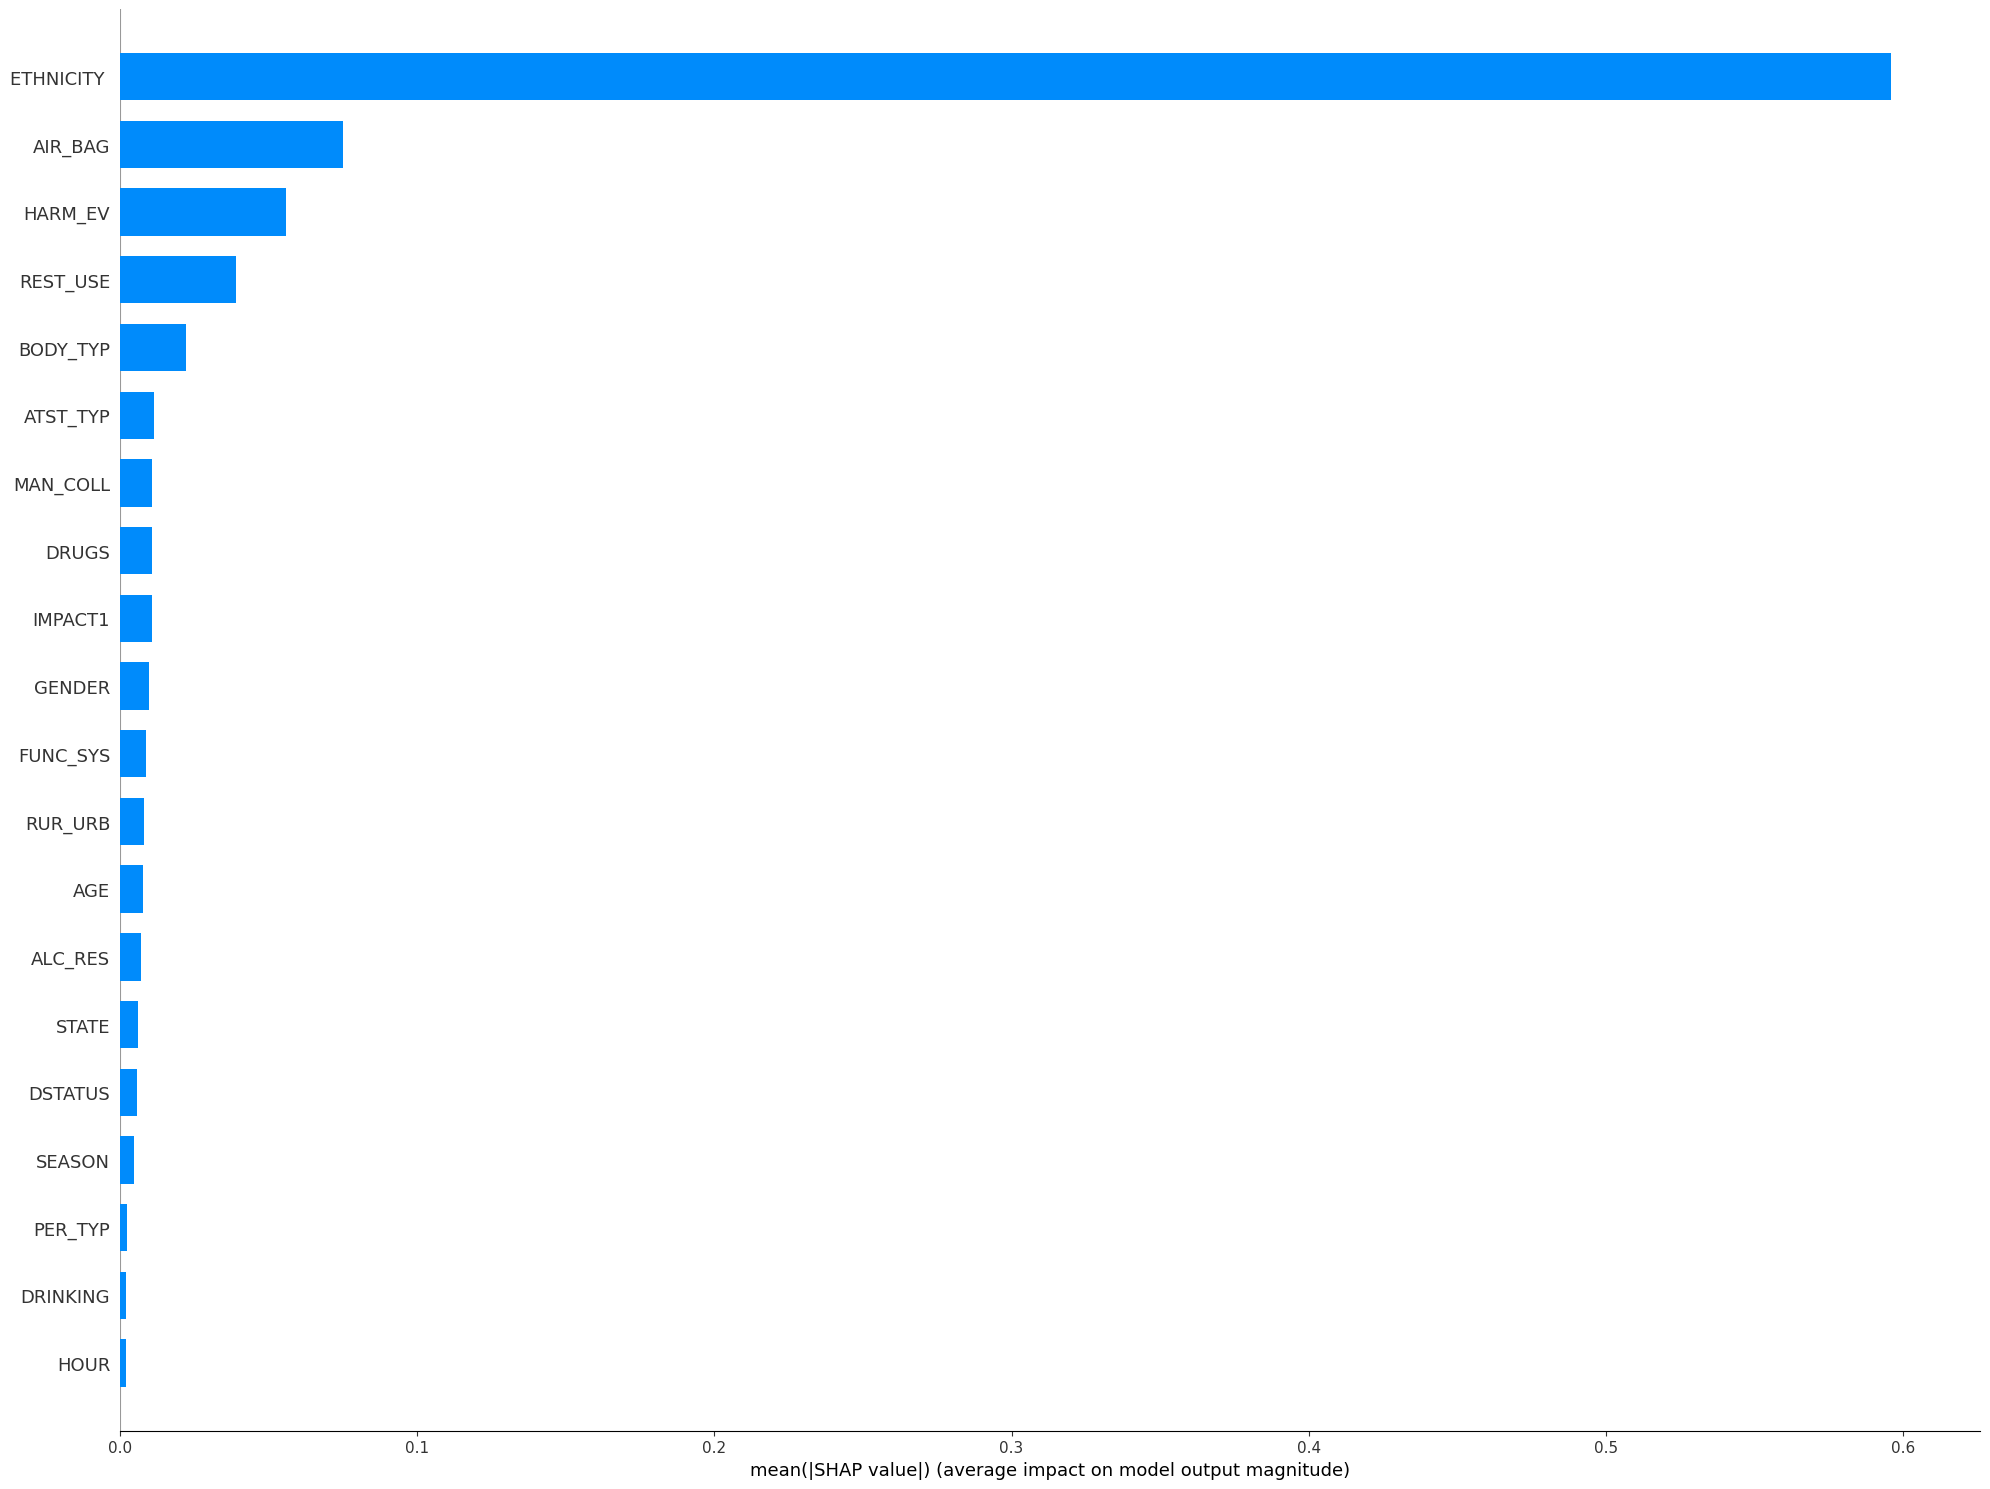

In [9]:
import shap 
explainer = shap.Explainer(model.predict,X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

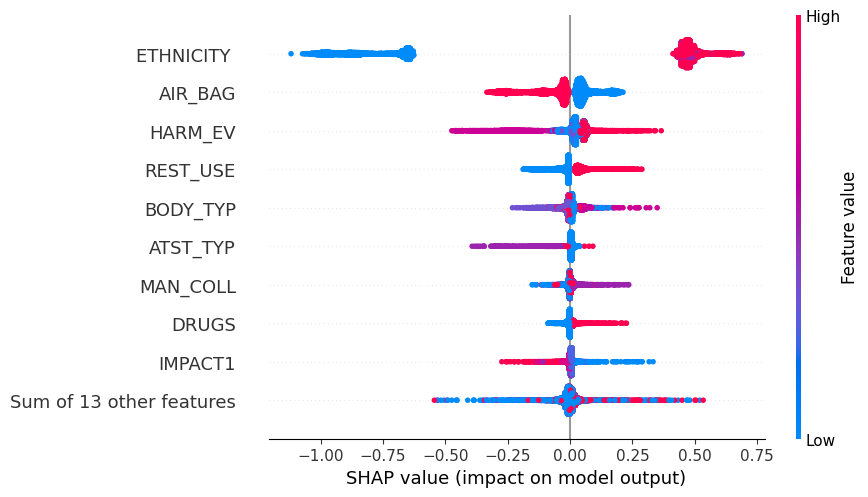

In [10]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)

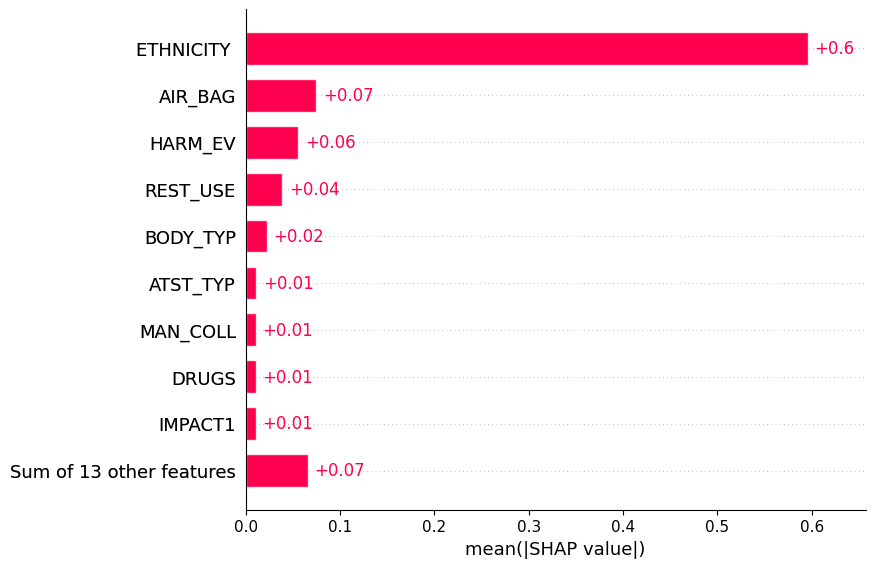

In [11]:
shap.plots.bar(explanation)

In [12]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    shap.plots.waterfall(explanation[i], show=False)
    plt.savefig(os.path.join("shap/ngboost/waterfall", f"waterfall_{i}.png"), dpi = 300,bbox_inches="tight")
    plt.close()


In [13]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    shap.force_plot(shap_values[i],feature_names=['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP', 'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG', 'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ', 'RUR_URB', 'FUNC_SYS', 'IMPACT1'], matplotlib=True, show=False)
    plt.savefig(os.path.join("shap/ngboost/force/", f"force_{i}.png"), dpi = 300,bbox_inches="tight")
    plt.close()


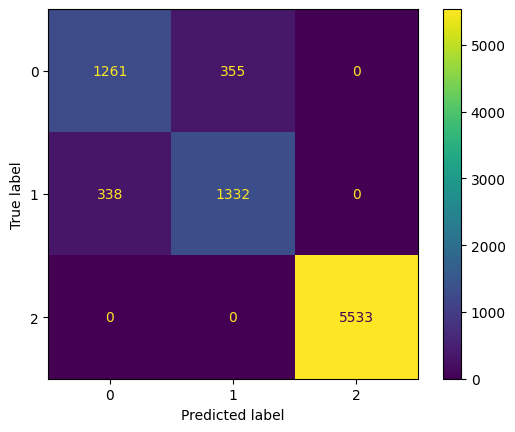

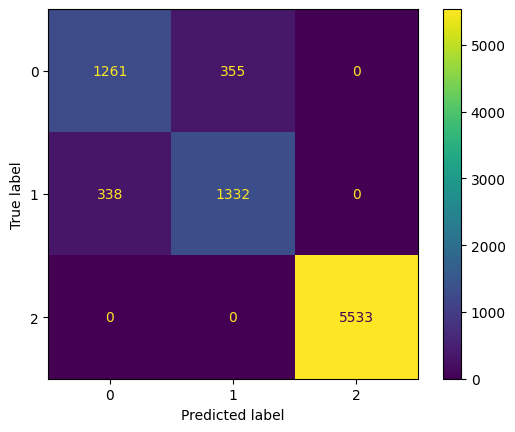

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix)
cm_display.plot()
plt.show()